In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Bank_churn_modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
x=['CreditScore', 'Geography','Gender', 'Age','Balance', 'NumOfProducts', 'IsActiveMember']
y=['Exited']

In [6]:
x=df[x]
y=df[y]

In [7]:
print(x.shape)
print(y.shape)

(10000, 7)
(10000, 1)


In [8]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1


In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
l1=LabelEncoder()
x["Gender"]=l1.fit_transform(x["Gender"])

<ipython-input-11-359c14245691>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"]=l1.fit_transform(x["Gender"])


In [12]:
encoder=ColumnTransformer([("sc",StandardScaler(),[0,3,4,5]),("on",OneHotEncoder(),[1])],remainder='passthrough')

In [13]:
encoder.fit(x)
x1=encoder.transform(x)

In [14]:
x2=pd.DataFrame(x1)
x2.head()

,0,1,2,3,4,5,6,7,8
0,-0.326221,0.293517,-1.225848,-0.911583,1.0,0.0,0.0,0.0,1.0
1,-0.440036,0.198164,0.117350,-0.911583,0.0,0.0,1.0,0.0,1.0
2,-1.536794,0.293517,1.333053,2.527057,1.0,0.0,0.0,0.0,0.0
3,0.501521,0.007457,-1.225848,0.807737,1.0,0.0,0.0,0.0,0.0
4,2.063884,0.388871,0.785728,-0.911583,0.0,0.0,1.0,0.0,1.0


In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x2,y,test_size=0.2)

In [16]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(8000, 9)
(8000, 1)
(2000, 9)
(2000, 1)


In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [26]:
dtc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.8505


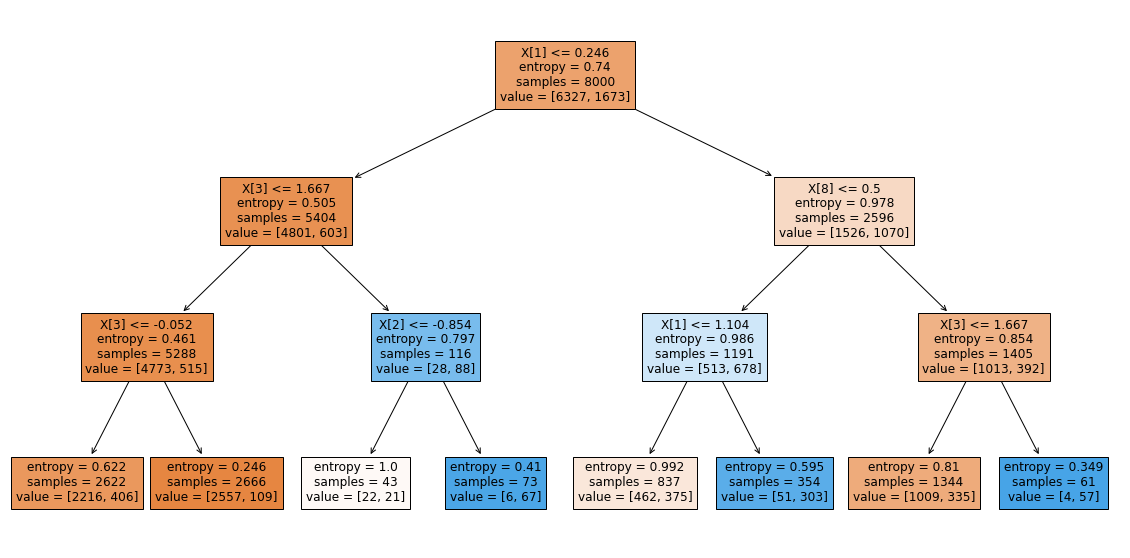

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtc,filled=True)
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc=RandomForestClassifier(n_estimators=20,criterion='entropy')
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)

<ipython-input-30-ed52cb892f3a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(xtrain,ytrain)


In [31]:
accuracy_score(ytest,ypred)

0.8635

In [32]:
newdata=[[750,"Germany",0,45,457889,1,1]]

In [33]:
ndata=encoder.transform(newdata)

In [34]:
rfc.predict_proba(ndata) #random forest

array([[0.45, 0.55]])

In [36]:
dtc.predict(ndata)

array([0], dtype=int64)

In [37]:
dtc.predict_proba(ndata) #decision tree model

array([[0.75074405, 0.24925595]])

In [38]:
ndata

array([[1.029206196103294, 0.5795781950006521, 6.112789162638634,
        -0.9115834940401767, 0.0, 1.0, 0.0, 0, 1]], dtype=object)